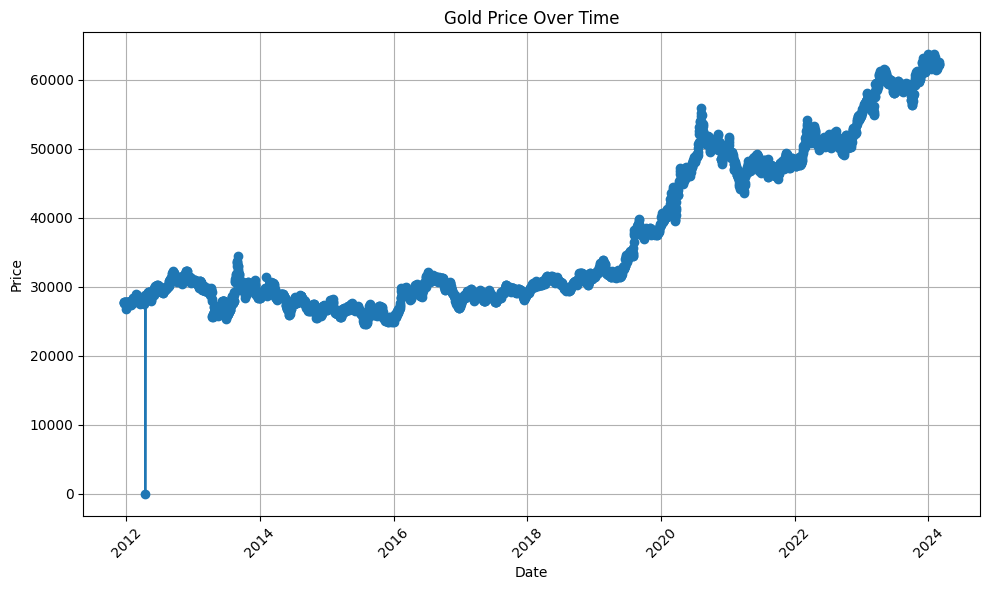

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("golddata.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert the 'Price' column to numeric after removing commas
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], marker='o', linestyle='-')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
data = pd.read_csv("golddata.csv")

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert the 'Price' column to numeric after removing commas
data['Price'] = pd.to_numeric(data['Price'].str.replace(',', ''))

# Create a Plotly figure
fig = go.Figure()

# Add a trace for the gold price over time
fig.add_trace(go.Scatter(x=data['Date'], y=data['Price'], mode='lines+markers'))

# Update layout
fig.update_layout(
    title='Gold Price Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    xaxis_tickangle=-45,
    showlegend=False,
    template='plotly_white'
)

# Show the plot
fig.show()


In [18]:
import pandas as pd

# List of file paths for all datasets
file_paths = [
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/golddata.csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX Cotton 29mm Futures (MCOTc1).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX COPPER (MCICOPR).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX ICOMDEX Crude Oil (MCICRD).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX Energy (MCIENRG).csv",
    "/Users/arsalan/Developer/RStudio/Data-Analytics-Lab_Sem_II/Mini Project/MCX iCOMDEX SILVER (MCISIL).csv"
]

# Read the data from each CSV file and merge it into a single DataFrame
all_data_df = pd.DataFrame(columns=['Date'])  # Initialize DataFrame with 'Date' column

# Merge data for each CSV file
for file_path in file_paths:
    # Read CSV file
    data = pd.read_csv(file_path)
    # Extract 'Date' and 'Price' columns
    data = data[['Date', 'Price']]
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # Get commodity name from file path
    commodity_name = file_path.split('/')[-1].split('.')[0].split()[-1]
    # Rename 'Price' column to commodity name
    data = data.rename(columns={'Price': commodity_name})
    # Merge data
    all_data_df = pd.merge(all_data_df, data, on='Date', how='outer')

# Sort DataFrame by 'Date' column
all_data_df = all_data_df.sort_values(by='Date').reset_index(drop=True)

# Save merged data to a new CSV file
all_data_df.to_csv("all_dates_data.csv", index=False)
